DIFFERENT SYSTEM TO MATCHMAKING 4 AND 5.

here the bottom 12 do a round robin.

In [156]:
# Custom round robin

import random
import pandas as pd
from itertools import combinations, chain

import matplotlib.pyplot as plt
import numpy as np


numtrials = 500
total_games_played = 0
totaltime = 0



In [157]:
countries = [
    'Argentina', 
    'Brazil', 
    'Colombia', 
    'Uraguay', 
    'Ecuador', 
    'Mexico', 
    'Panama', 
    'Morocco', 
    'Egypt', 
    'Spain', 
    'UK', 
    'Italy', 
    'France', 
    'Germany', 
    'Netherlands', 
    'Japan', 
    'South Korea', 
    "Australia", 
    'Turkey', 
    'New Zealand'
]

pools = {
    1: ['Argentina', 'Brazil', 'Colombia', 'Uraguay', 'Ecuador'],
    2: ['Mexico', 'Panama', 'Morocco', 'Egypt', 'Spain'],
    3: ['UK', 'Italy', 'France', 'Germany', 'Netherlands'],
    4: ['Japan', 'South Korea', "Australia", 'Turkey', 'New Zealand']
}

countriesratings = {
    'Argentina': 2140, 
    'Brazil': 1994, 
    'Colombia': 1953, 
    'Uraguay': 1922, 
    'Ecuador': 1911, 
    'Mexico': 1817, 
    'Panama': 1724, 
    'Morocco': 1807, 
    'Egypt': 1668, 
    'Spain': 2150, 
    'UK': 2012, 
    'Italy': 1914, 
    'France': 2031, 
    'Germany': 1988, 
    'Netherlands': 1967, 
    'Japan': 1875, 
    'South Korea': 1745, 
    "Australia": 1736, 
    'Turkey': 1837, 
    'New Zealand': 1596
}

import folium
from IPython.display import display

locations = [
    (-38.4161, -63.6167),
    (-14.2350, -51.9253),
    (4.5709, -74.2973),
    (-32.5228, -55.7658),
    (-1.8312, -78.1834),
    (23.6345, -102.5528),
    (8.5376, -80.7821),
    (21.1280, -13.1628),
    (26.8206, 30.8025),
    (40.4637, -3.7492),
    (55.3781, -3.4360),
    (41.8719, 12.5674),
    (46.6034, 1.8883),
    (51.1657, 10.4515),
    (52.1326, 5.2913),
    (36.2048, 138.2529),
    (35.9078, 127.7669),
    (-25.2744, 133.7751),
    (38.9637, 35.2433),
    (-40.9006, 174.8860),
]

locationdict = {country: locations[countries.index(country)] for country in countries}
print(locationdict)

games_played_country = {country: 0 for country in countries}

# plot all countries on a map
m = folium.Map(location=[20, 20], zoom_start=2)
for name, rating, location in zip(countries, countriesratings.values(), locations):
    folium.Marker(
        location=location,
        icon=folium.Icon(color="red"),
        tooltip=f"{name} [{rating}]",
    ).add_to(m)
display(m)

from math import radians, sin, cos, sqrt, atan2


# DISTANCE CALCULATIONS
def haversine(pos1, pos2):
    lat1, lon1 = pos1
    lat2, lon2 = pos2
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    R = 6371.0 # Radius of Earth in kilometers
    return R * c # Distance in kilometers


def estimate_flight_time(pos1, pos2, speed_kmh=900):
    distance = haversine(pos1, pos2)
    time_hours = distance / speed_kmh
    return time_hours

estimate_flight_time(locations[0], locations[1])  # Example flight time between Argentina and Brazil


{'Argentina': (-38.4161, -63.6167), 'Brazil': (-14.235, -51.9253), 'Colombia': (4.5709, -74.2973), 'Uraguay': (-32.5228, -55.7658), 'Ecuador': (-1.8312, -78.1834), 'Mexico': (23.6345, -102.5528), 'Panama': (8.5376, -80.7821), 'Morocco': (21.128, -13.1628), 'Egypt': (26.8206, 30.8025), 'Spain': (40.4637, -3.7492), 'UK': (55.3781, -3.436), 'Italy': (41.8719, 12.5674), 'France': (46.6034, 1.8883), 'Germany': (51.1657, 10.4515), 'Netherlands': (52.1326, 5.2913), 'Japan': (36.2048, 138.2529), 'South Korea': (35.9078, 127.7669), 'Australia': (-25.2744, 133.7751), 'Turkey': (38.9637, 35.2433), 'New Zealand': (-40.9006, 174.886)}


3.2491632111878563

In [158]:
def winrate(country1, country2):
    return (1/(1 + 10**((countriesratings[country2]-countriesratings[country1])/400)))

In [159]:
def simulate_match(country1, country2):
    
    global totaltime
    totaltime += estimate_flight_time(locationdict[country1], locationdict[country2])
    
    global total_games_played
    total_games_played += 1
    
    games_played_country[country1] += 1
    games_played_country[country2] += 1
    
    percent1 = winrate(country1, country2)
    
    if random.random() < percent1:
        result = 'win'
    else:
        result = 'loss'
    
    if result == 'win':
        return country1, 3, country2, 0  # country1 wins, gets 3 points, country2 gets 0
    elif result == 'loss':
        return country1, 0, country2, 3  # country2 wins, gets 3 points, country1 gets 0
    else:
        return country1, 1, country2, 1  # Draw, both get 1 point each
    

In [160]:
def init_standings(teams):
    return {team: {'wins': 0, 'losses': 0, 'draws': 0, 'points': 0} for team in teams}

In [161]:
def round_robin(teams):
    standings = init_standings(teams)
    for team1, team2 in combinations(teams, 2):
        t1, p1, t2, p2 = simulate_match(team1, team2)
        standings[t1]['points'] += p1
        standings[t2]['points'] += p2
        if p1 == 3:
            standings[t1]['wins'] += 1
            standings[t2]['losses'] += 1
        elif p2 == 3:
            standings[t2]['wins'] += 1
            standings[t1]['losses'] += 1
        else:
            standings[t1]['draws'] += 1
            standings[t2]['draws'] += 1
    return standings


In [162]:

def sort_standings(standings):
    df = pd.DataFrame(standings).T
    df = df.sort_values(by=['points', 'wins'], ascending=False)
    return df

In [163]:

def simulate_knockout(teams):
    seeded = []
    
    for country in teams:
        seeded.append((country, countriesratings[country]))
    
    seeded.sort(key=lambda x: x[1], reverse=True)
    quarter_finalists = [seeded[0][0], seeded[7][0], seeded[3][0], seeded[4][0], seeded[1][0], seeded[6][0], seeded[2][0], seeded[5][0]]
    semi_finalists = []
    bottom4 = []
    thirdfourth = []
    

    # Quarterfinals
    for i in range(0, 8, 2):
        team1, team2 = quarter_finalists[i], quarter_finalists[i+1]
        winner = simulate_match(team1, team2)[0 if random.random() < winrate(team1, team2) else 2]
        semi_finalists.append(winner)
        if winner != team1:
            bottom4.append(team1)
        else:
            bottom4.append(team2)
    
    # Sort bottom4 based on the order they appear in the list seeded
    bottom4.sort(key=lambda x: next(i for i, v in enumerate(seeded) if v[0] == x))

    # Semifinals
    finalists = []
    for i in range(0, 4, 2):
        team1, team2 = semi_finalists[i], semi_finalists[i+1]
        winner = simulate_match(team1, team2)[0 if random.random() < winrate(team1, team2) else 2]
        finalists.append(winner)
        if winner != team1:
            thirdfourth.append(team1)
        else:
            thirdfourth.append(team2)
    thirdfourth.sort(key=lambda x: next(i for i, v in enumerate(seeded) if v[0] == x))
    

    # Final
    final_winner = simulate_match(finalists[0], finalists[1])[0 if random.random() < winrate(team1, team2) else 2]
    if final_winner != finalists[0]:
        second = finalists[0]
    else:
        second = finalists[1]
    
    return {
        bottom4[0]: 5,
        bottom4[1]: 6,
        bottom4[2]: 7,
        bottom4[3]: 8,
        thirdfourth[0]: 3,
        thirdfourth[1]: 4,
        second: 2,
        final_winner: 1
    }


{'Argentina': 2.924, 'Brazil': 6.446, 'Colombia': 8.362, 'Uraguay': 10.02, 'Ecuador': 10.968, 'Mexico': 12.376, 'Panama': 16.026, 'Morocco': 13.244, 'Egypt': 17.456, 'Spain': 2.488, 'UK': 6.03, 'Italy': 10.242, 'France': 5.606, 'Germany': 7.922, 'Netherlands': 9.344, 'Japan': 8.712, 'South Korea': 15.212, 'Australia': 15.566, 'Turkey': 12.258, 'New Zealand': 18.798}


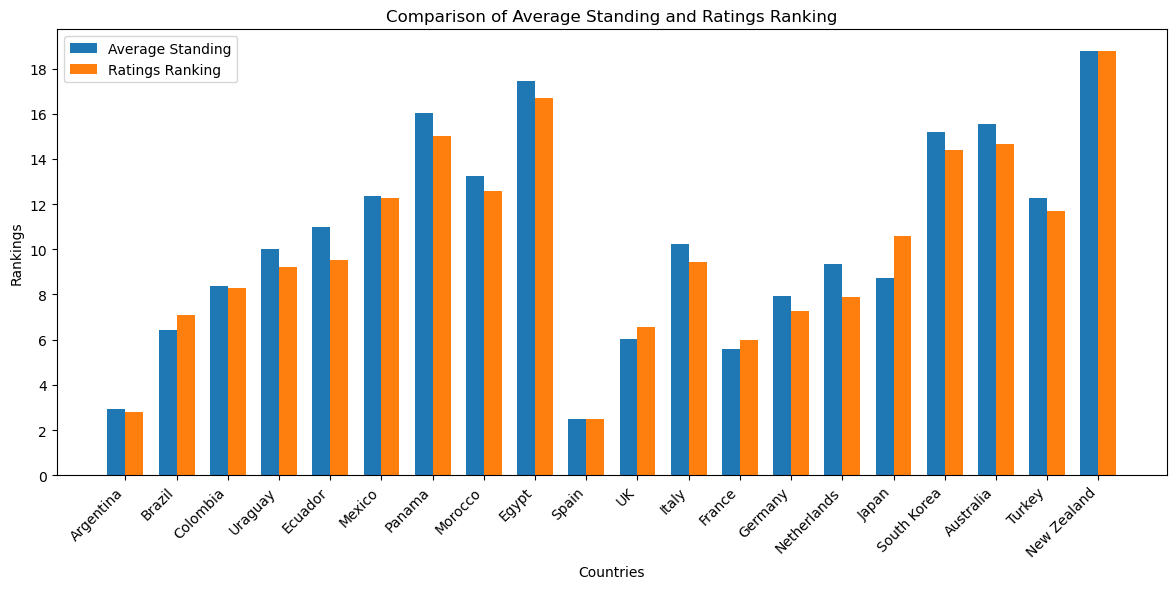

Total games played: 141.0
Total time: 1267.207053297074 hours
{'Argentina': 8.328, 'Brazil': 13.138, 'Colombia': 14.174, 'Uraguay': 14.772, 'Ecuador': 14.8, 'Mexico': 16.138, 'Panama': 16.978, 'Morocco': 16.488, 'Egypt': 16.002, 'Spain': 8.696, 'UK': 11.422, 'Italy': 14.664, 'France': 12.114, 'Germany': 13.568, 'Netherlands': 14.324, 'Japan': 10.934, 'South Korea': 17.264, 'Australia': 16.844, 'Turkey': 15.654, 'New Zealand': 15.698}


In [164]:
from scipy.stats import chisquare


winners = {country: 0 for country in countries}
avgstandings = {country: 0 for country in countries}

for i in range(numtrials):

    pool_results = {}
    direct_to_quarters = []
    qualifier_candidates = []
    bottom12 = []

    # ---------- Phase 1: Group Roundrobin ----------
    for pool_name, teams in pools.items():
        standings = round_robin(teams)
        df = sort_standings(standings)
        pool_results[pool_name] = df
        direct_to_quarters.append(df.index[0])            # Top 1 to quarters
        qualifier_candidates.extend(df.index[1:3]) 
        bottom12.extend(df.index[3:5])

    # ---------- Phase 2: Qualifiers: Next 8 teams run in qualifiers ----------
    qualifier_results = round_robin(qualifier_candidates)
    qualifier_df = sort_standings(qualifier_results)
    qualifier_top4 = list(qualifier_df.index[:4])
    bottom12.extend(qualifier_df.index[4:])

    # ---------- Phase 3: Knockout ----------
    knockout_teams = direct_to_quarters + qualifier_top4
    knockout_results = simulate_knockout(knockout_teams)

    
    # ---------- Phase 4: Placement Round ----------
    placement_results = round_robin(bottom12)
    placement_df = sort_standings(placement_results)
    
    sorted_placement = sorted(placement_results.keys(), key=lambda x: placement_results[x]['points'], reverse=True)
    
    standings = init_standings(countries)
    
    rank = 9
    for country in sorted_placement:
        standings[country] = rank
        rank += 1
    
    sorted_knockout = sorted(knockout_results.items(), key=lambda x: x[1])
    for country, position in sorted_knockout:
        standings[country] = position
    
    for country, position in standings.items():
        if position == 1:
            winners[country] += 1
            
        avgstandings[country] += position

for country, position in avgstandings.items():
    avgstandings[country] = position/numtrials
print(avgstandings)



# ---------------------------- PLOTTING ---------------------------------
# Calculate rankings based on countriesratings
ratings_ranking = {country: rank for rank, country in enumerate(sorted(countriesratings, key=countriesratings.get, reverse=True), start=1)}

# Prepare data for the bar graph
avg_standings_values = [avgstandings[country] for country in countries]

# Perform max-min normalization for ratings
min_avg_standing = min(avg_standings_values)
max_avg_standing = max(avg_standings_values)

normalized_ratings = {
    country: max_avg_standing - ((max_avg_standing - min_avg_standing) * (countriesratings[country] - min(countriesratings.values())) / 
                                 (max(countriesratings.values()) - min(countriesratings.values())))
    for country in countries
}

ratings_ranking_values = [normalized_ratings[country] for country in countries]

x = np.arange(len(countries))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, avg_standings_values, width, label='Average Standing')
rects2 = ax.bar(x + width/2, ratings_ranking_values, width, label='Ratings Ranking')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Countries')
ax.set_ylabel('Rankings')
ax.set_title('Comparison of Average Standing and Ratings Ranking')
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')
ax.legend()
fig.tight_layout()

ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

print(f"Total games played: {total_games_played/numtrials}")
print(f"Total time: {totaltime/numtrials} hours")

for country, num in games_played_country.items():
    games_played_country[country] = num/numtrials
print(games_played_country)
